In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers.core import Dense
from keras.layers.core import Flatten
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from keras.preprocessing import image as imag
from PIL import Image

In [2]:
data_dir='dataset/train'

In [3]:
test_data_dir='dataset/test'

In [4]:
img_height,img_width=224,224
img_path=data_dir+'/0/1.png'
img=imag.load_img(img_path,target_size=(img_height,img_width))
img_data=np.asarray(img)
img_data=np.expand_dims(img_data,axis=0)
img_data=preprocess_input(img_data)

<class 'PIL.Image.Image'>


Text(0.5, 1.0, 'Second')

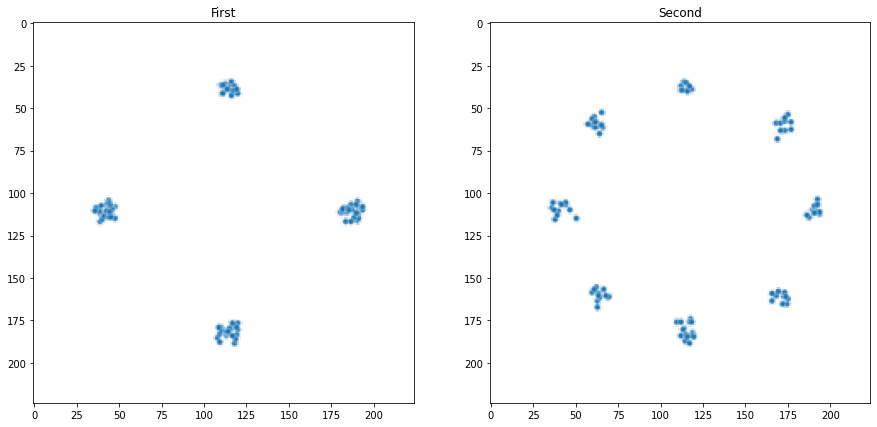

In [5]:
from matplotlib import pyplot as plt
from PIL import Image
 
# Opens a image in RGB mode
newsize=(224,224)
im1 = Image.open(r"dataset/train/0/400.png")
im1 = im1.resize(newsize)
im2 = Image.open(r"dataset/train/1/400.png")
im2 = im2.resize(newsize)
print(type(im1))
# create figure
fig = plt.figure(figsize=(15, 15))
  
# setting values to rows and column variables
rows = 1
columns = 2

  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(im1)
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(im2)
plt.title("Second")

In [6]:
r_filter_dim=(24,200)

In [7]:
# for qpsk
dis=37
g_filter_dim=[(dis,112),(112,dis),(224-dis,112),(112,224-dis)]

In [8]:
# for 8 psk
x=60
b_filter_dim=[(x,x),(x,224-x),(224-x,x),(224-x,224-x),(dis,112),(112,dis),(224-dis,112),(112,224-dis)]

In [9]:
def gen_circle(img: np.ndarray, center: tuple, diameter: int) -> np.ndarray:
  
    """
        Creates a matrix of ones filling a circle.
    """

    # gets the radius of the image
    radius  = diameter//2

    # gets the row and column center of the image
    row, col = center 

    # generates theta vector to variate the angle
    theta = np.arange(0, 360)*(np.pi/180)

    # generates the indexes of the column
    y = (radius*np.sin(theta)).astype("int32") 

    # generates the indexes of the rows
    x = (radius*np.cos(theta)).astype("int32") 

    # with:
    # img[x, y] = 1
    # you can draw the border of the circle 
    # instead of the inner part and the border. 

    # centers the circle at the input center
    rows = x + (row)
    cols  = y + (col)

    # gets the number of rows and columns to make 
    # to cut by half the execution
    nrows = rows.shape[0] 
    ncols = cols.shape[0]

    # makes a copy of the image
    img_copy = np.copy(img)

    # We use the simetry in our favour
    # does reflection on the horizontal axes 
    # and in the vertical axes

    for row_down, row_up, col1, col2 in zip(rows[:nrows//4],
                            np.flip(rows[nrows//4:nrows//2]),
                            cols[:ncols//4],
                            cols[nrows//2:3*ncols//4]):
    
        img_copy[row_up:row_down, col2:col1] = 1

 
    return img_copy

In [10]:
def apply_filter(im):
  center = (112,112)
  #red layer filter 
  rect=np.zeros((224,224))
  for i in range(r_filter_dim[0],r_filter_dim[1]+1):
    for j in range(r_filter_dim[0],r_filter_dim[1]+1):
      rect[i][j]=1
  im[:,:,0]=im[:,:,0]*rect

  #blue layer filter
  circle = np.zeros((center[0]*2, center[1]*2))
  diameter = 25
  for i in range(4):
    circle = gen_circle(circle,g_filter_dim[i], diameter)
  im[:,:,1]=im[:,:,1]*circle


  #blue layer filter
  circle_1 = np.zeros((center[0]*2, center[1]*2))
  diameter = 25
  for i in range(4):
    circle_1 = gen_circle(circle_1,b_filter_dim[i], diameter)
  im[:,:,2]=im[:,:,2]*circle_1
  return im

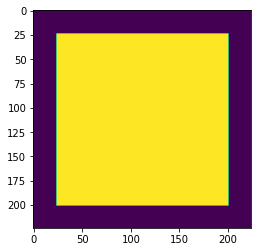

In [11]:
center = (112,112)
#red layer filter 
rect=np.zeros((224,224))
for i in range(r_filter_dim[0],r_filter_dim[1]+1):
  for j in range(r_filter_dim[0],r_filter_dim[1]+1):
    rect[i][j]=1
plt.imshow(rect)

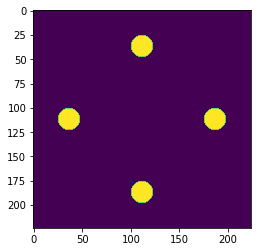

In [12]:
#green layer filter
circle = np.zeros((center[0]*2, center[1]*2))
diameter = 25
for i in range(4):
  circle = gen_circle(circle,g_filter_dim[i], diameter)
plt.imshow(circle)

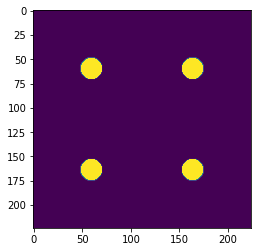

In [13]:
#blue layer filter
circle_1 = np.zeros((center[0]*2, center[1]*2))
diameter = 25
for i in range(4):
  circle_1 = gen_circle(circle_1,b_filter_dim[i], diameter)
plt.imshow(circle_1)

In [14]:
def disp_filter_image(im):
  im=apply_filter(im)
  plt.imshow(im)
  plt.axis('off')

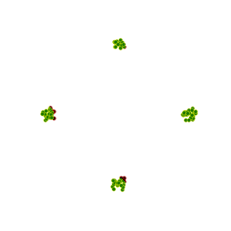

In [15]:
im1=np.array(im1)
disp_filter_image(im1)

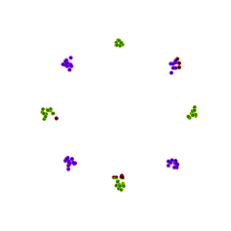

In [16]:
im2=np.array(im2)
disp_filter_image(im2)

In [17]:
classes=[str(i) for i in range(6)]

In [18]:
val_data_dir='dataset/valid'

In [19]:
def preprocess_data(X,Y,n):
  X_p=preprocess_input(X)
  Y_p=tf.keras.utils.to_categorical(Y,n)
  return (X_p,Y_p)

## Loading the training data

In [20]:
train_data_1=[]
img_height,img_width=224,224
for cls in range(2):
  print(cls)
  for i in range(500):
    img_path=data_dir+'/'+str(cls)+'/'+str(i)+'.png'
    img=imag.load_img(img_path,target_size=(img_height,img_width))
    img_data=np.asarray(img)
    train_data_1.append(img_data)

0
1


In [21]:
imgs_cnt=len(train_data_1)

In [22]:
train_images_per_class = 500

In [23]:
train_label_1=[]
train_label_1[:train_images_per_class]=[0]*train_images_per_class
train_label_1[train_images_per_class:]=[1]*train_images_per_class

In [24]:
train_data_1=np.asarray(train_data_1)
train_label_1=np.asarray(train_label_1)

In [25]:
valid_data_1=[]
valid_label_1=[]
img_height,img_width=224,224
for cls in range(2):
  print(cls)
  for i in range(100):
    img_path=val_data_dir+'/'+str(cls)+'/'+str(i)+'.png'
    img=imag.load_img(img_path,target_size=(img_height,img_width))
    img_data=np.asarray(img)
    valid_data_1.append(img_data)

0
1


In [26]:
valid_images_per_class=100

In [27]:
valid_label_1[:valid_images_per_class]=[0]*valid_images_per_class
valid_label_1[valid_images_per_class:]=[1]*valid_images_per_class

In [28]:
valid_imgs_cnt=len(valid_data_1)

In [29]:
valid_data_1=np.asarray(valid_data_1)
valid_label_1=np.asarray(valid_label_1)

In [30]:
for i in range(imgs_cnt):
  train_data_1[i]=apply_filter(train_data_1[i])

In [31]:
for i in range(valid_imgs_cnt):
  valid_data_1[i]=apply_filter(valid_data_1[i])

In [32]:
train_data_1,train_label_1=preprocess_data(train_data_1,train_label_1,2)

In [33]:
valid_data_1,valid_label_1=preprocess_data(valid_data_1,valid_label_1,2)

In [34]:
valid_label_1.shape

(200, 2)

In [35]:
print(train_data_1.shape,train_label_1.shape)

(1000, 224, 224, 3) (1000, 2)


## Model

In [36]:
resnet_model_1 = Sequential()
input_t=tf.keras.Input(shape=(224,224,3))
pretrained_model_1= tf.keras.applications.ResNet50(include_top=False,
                   input_tensor=input_t,
                   pooling='max',classes=2,
                   weights='imagenet')
for layer in pretrained_model_1.layers:
        layer.trainable=False

resnet_model_1.add(pretrained_model_1)

In [37]:
resnet_model_1.add(Flatten())
resnet_model_1.add(Dense(512, activation='relu'))
resnet_model_1.add(Dense(2, activation='softmax'))

In [38]:
resnet_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
_________________________________________________________________


In [39]:
resnet_model_1.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history_1 = resnet_model_1.fit(train_data_1,train_label_1,validation_data=(valid_data_1,valid_label_1),batch_size=32, epochs=5,verbose=1)

c:\python\python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
32/32 [==============================] - 123s 4s/step - loss: 7.1925 - accuracy: 0.6750 - val_loss: 1.1098 - val_accuracy: 0.7750
Epoch 2/5
32/32 [==============================] - 124s 4s/step - loss: 0.4523 - accuracy: 0.8730 - val_loss: 0.2982 - val_accuracy: 0.8800
Epoch 3/5
32/32 [==============================] - 115s 4s/step - loss: 0.4695 - accuracy: 0.8690 - val_loss: 0.6586 - val_accuracy: 0.8700
Epoch 4/5
 1/32 [..............................] - ETA: 1:33 - loss: 1.2191 - accuracy: 0.8438

KeyboardInterrupt: 

In [47]:
test_data_1=[]
img_height,img_width=224,224
for cls in range(2):
  print(cls)
  for i in range(150):
    img_path=test_data_dir+'/'+str(cls)+'/'+str(i)+'.png'
    img=imag.load_img(img_path,target_size=(img_height,img_width))
    img_data=np.asarray(img)
    test_data_1.append(img_data)

0
1


In [48]:
test_images_per_class=150

In [49]:
test_label_1=[]
test_label_1[:test_images_per_class]=[0]*test_images_per_class
test_label_1[test_images_per_class:]=[1]*test_images_per_class

In [50]:
test_data_1=np.asarray(test_data_1)
test_label_1=np.asarray(test_label_1)

In [51]:
for i in range(300):
  test_data_1[i]=apply_filter(test_data_1[i])

In [52]:
test_data_1,test_label_1=preprocess_data(test_data_1,test_label_1,2)

In [53]:
test_data_1.shape,test_label_1.shape

((300, 224, 224, 3), (300, 2))

In [55]:
test_loss_1,test_acc_1=resnet_model_1.evaluate(test_data_1,test_label_1,verbose=1)

10/10 [==============================] - 30s 3s/step - loss: 0.2358 - accuracy: 0.9167


In [56]:
print('Testing data accuracy = '+str(test_acc_1)+'\n Testing data loss = '+str(test_loss_1))

Testing data accuracy = 0.9166666865348816
 Testing data loss = 0.23577387630939484


In [57]:
model_json_1 = resnet_model_1.to_json()
with open("Models/filter_model_2.json", "w") as json_file:
    json_file.write(model_json_1)
# serialize weights to HDF5
resnet_model_1.save_weights("Models/filter_model_2.h5")
print("Saved model to disk")

c:\python\python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Saved model to disk
